# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices. In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition. Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

The business goal here is to understand pricing for cars, discern the major attributes of a car that influence the pricing, and then build a model that helps us predict the pricing. A used car dealership is a very cash starved business, and the flow of inventory is very important. It's important to help dealers with this pricing model so that they can
1. Pay the appropriate price for new inventory
2. Set profitable, yet competitive prices for consumers

If a dealer understands pricing then they can maximize margins and target certain stock.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

There are two broad steps in this part of the CRISP-DM framework:
1. Understand data for quality and usability
2. Understand data for insights and approach

Bear in mind that these two steps often intertwine, so depending on our findings we may integrate them for certain substeps of the data understanding phase.

I've found the best thing to do is to simply start looking at the data to find the right cue to proceed. I will annotate and structure this notebook so that it is clear which actions I am taking.

#### Initial understanding

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
import random

In [2]:
data = pd.read_csv('data/vehicles.csv')

In [3]:
data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


The number of missing values is striking, even with just 5 rows. I'll pin this for further evaluation.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

Several attributes have a dtype of "object", though they may possibly be better evaluated with a binary encoding or even converted into a numeric, such as the number of cylinders.

VIN is a unique identifier for a vehicle, but actually confers no useful value in this assessment.

Based on my practical experience, I assume that the age, mileage, condition, and model of the vehicle will have the most impact on price.

##### Numerical data

In [5]:
data.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


The spread for price, odometer, and year are all questionable.

For example, the min value for year is 1900, which is obviously bogus.

The max value for odometer is 10,000,000 miles, an absurd number.

In [6]:
numerics = ['price', 'odometer', 'year']

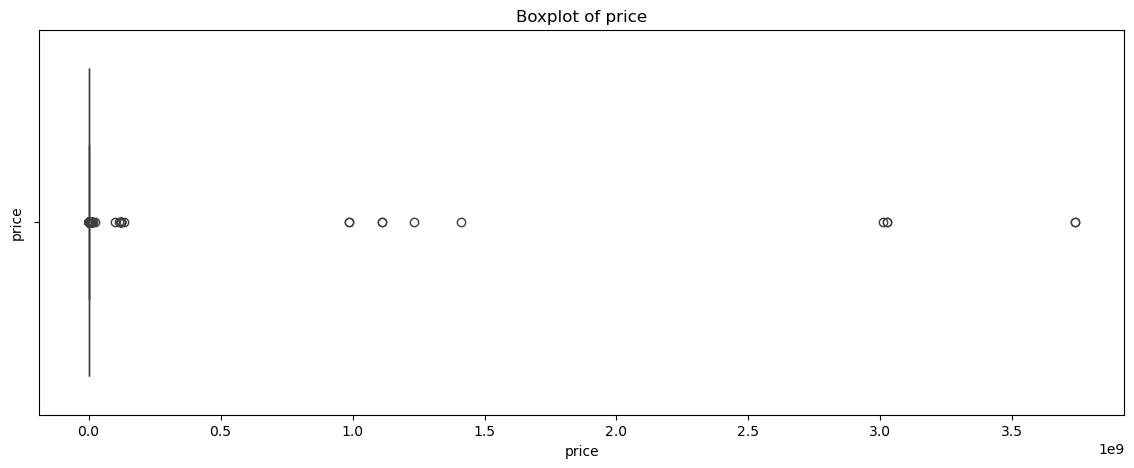

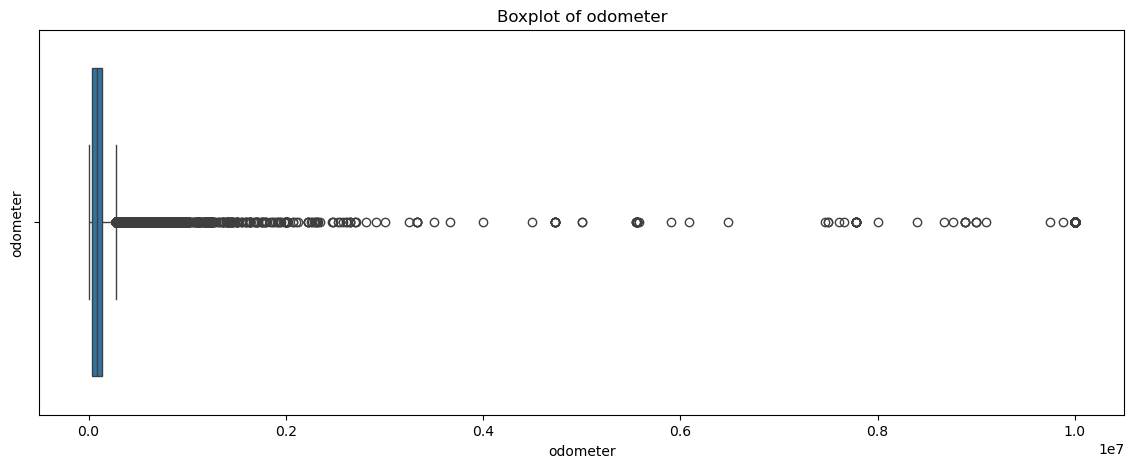

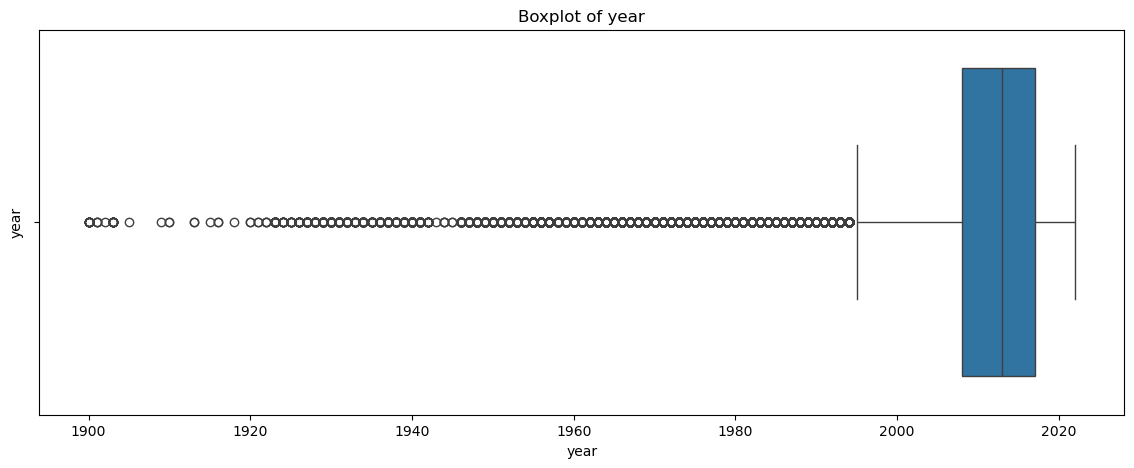

In [7]:
for column in numerics:
    plt.figure(figsize=(14,5))
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}")
    plt.ylabel(column)
    plt.show()

##### Non-numeric

In [8]:
data.describe(exclude=[np.number])

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


There is inconsistency with the count for these rows, which again suggests there are many missing values.

Model has 29649 unique values, which makes me doubt its usefulness. Possibly it is a freeform text field, and not reliable.
I would have the same complaint for VIN, but I already know it has no useful business meaning here, and we can discard it.

In [9]:
data['model'].value_counts().sort_values().head(15)

Land Crusier FJ55              1
qx60 pure awd                  1
c7500 service truck w crane    1
Workhorse P42 Step Van         1
express shuttle bus            1
fuso fe180 18' box t           1
equinox fwd 4dr ls             1
c7500 enclosed service truc    1
STERLING Acterra Lube Truck    1
e450 azure hybrid shuttle      1
f750 boom bucket truck         1
tl 3.2 sedan                   1
c4500 4x4 service tru          1
focus electric automatic       1
legacy gt special edition      1
Name: model, dtype: int64

Just by reviewing this, we can see non standard capitalization, spelling, format, etc. We cannot use this and will need to dispense with it later.

__Examining values for select attributes__

I'd like to see unique values for some of these attributes so I can have a little better business understanding.

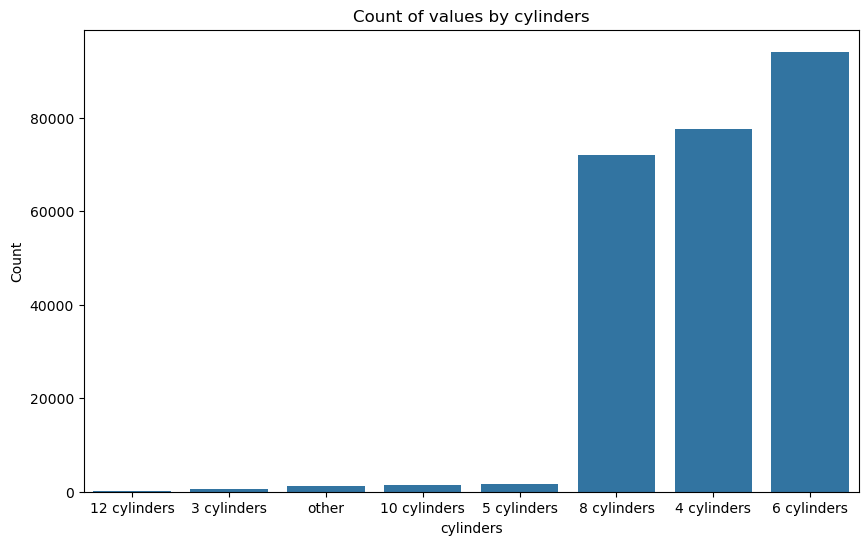

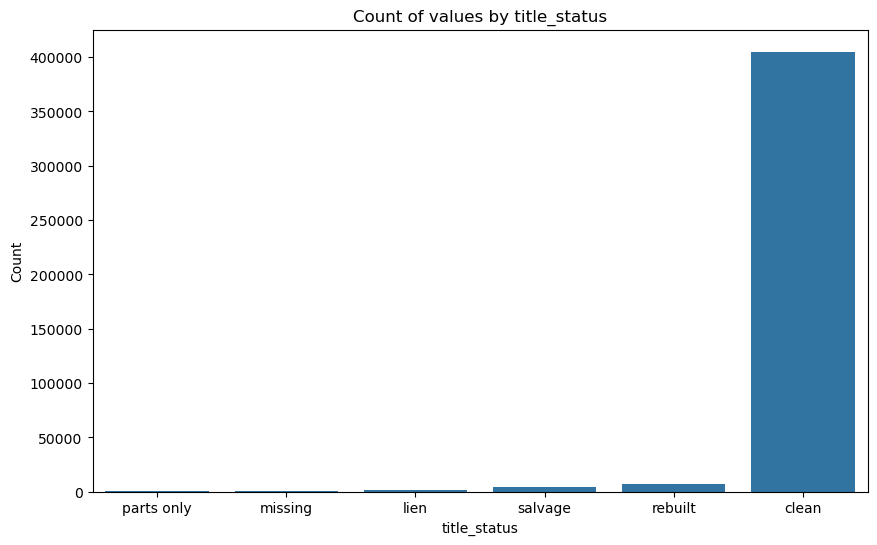

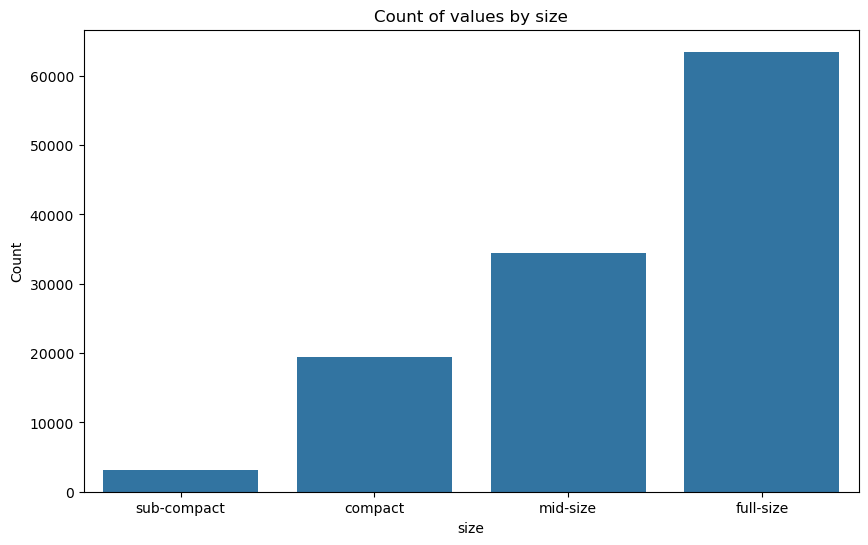

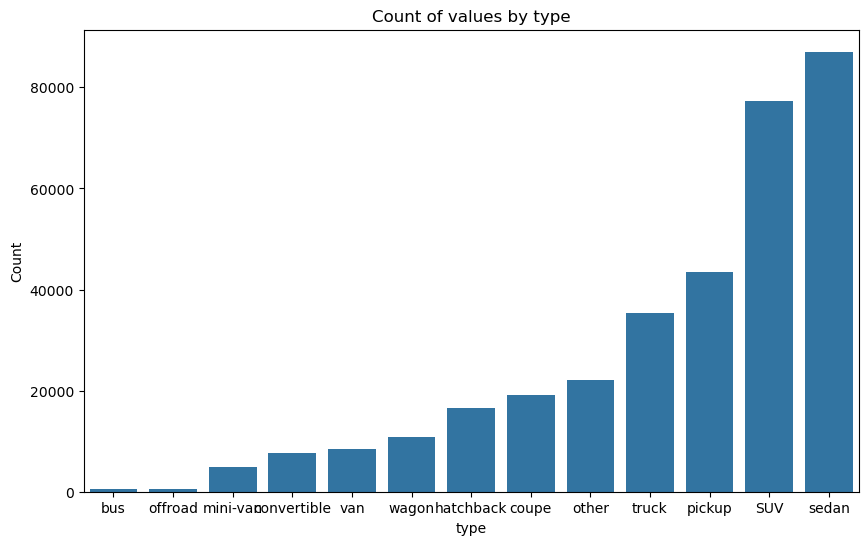

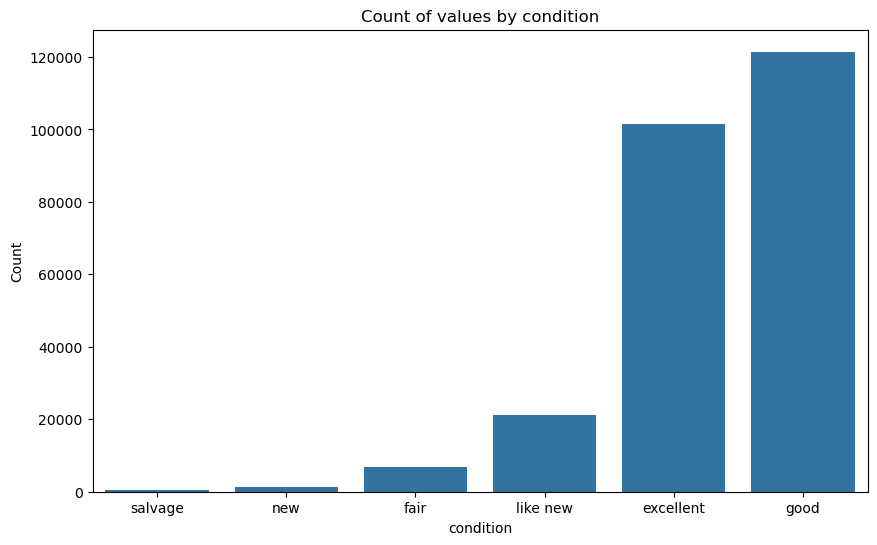

In [10]:
interesting_attributes = ['cylinders', 'title_status', 'size', 'type', 'condition']

for attribute in interesting_attributes:
    # set up temp data
    temp_counts = data[attribute].value_counts().sort_values()
    
    # plot data
    plt.figure(figsize=(10, 6))
    sns.barplot(data=temp_counts)

    plt.title(f'Count of values by {attribute}')
    plt.xlabel(attribute)
    plt.ylabel('Count')
    plt.show()
    
    

#### Quality
Here are a few steps I will take to validate the data for usability (in no particular order):
 - eliminate duplicates
 - resolve structural errors
 - filter outliers
 - handle missing data
 - validate
 
 In this phase I will identify issues, and in the Data Preparation phase I will resolve the issues.

##### Missing data
Based on the above data review, it is likely that we will see many missing values, so I will confirm now:

In [11]:
missing = pd.DataFrame(data.isnull().sum())
missing = missing.rename(columns={0: 'Missing count'})
missing

,Missing count
id,0
region,0
price,0
year,1205
manufacturer,17646
model,5277
condition,174104
cylinders,177678
fuel,3013
odometer,4400


A lot of data is missing. I will calculate the % of rows with missing data, so that I can understand if there will even be enough for modeling after eventually dropping missing data.

In [12]:
rows_with_missing = data[data.isnull().any(axis=1)]
print(f'Total rows: {data.shape[0]}')
print(f'Number of rows with missing data: {rows_with_missing.shape[0]}')
print(f'Number of rows without missing data: {data.shape[0] - rows_with_missing.shape[0]}')

Total rows: 426880
Number of rows with missing data: 392012
Number of rows without missing data: 34868


~35,000 row is a lot of data, though our final decision can be made once we settle on the number of dimensions (due to the curse of dimensionality)

##### Duplicates

In [13]:
duplicates = data[data.duplicated()]

print(f'Duplicates: {duplicates.shape[0]}')

Duplicates: 0


No duplicates to deal with here.

##### Structural errors

Earlier we determined that "model" was free form and needed to be dropped. Other fields are in a good state from a structural perspective.

##### Outliers
We observed outliers in most of our numeric data when doing our initial exploration. We'll need to handle these in the preparation phase.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

#### Dropping unneeded columns

We identified a few columns which are unnecessary to our analysis:
 - id, which is simply an identifier for a row
 - VIN, which is a unique value for a car and not useful here
 - Model, which has junk
 
Thinking about the business problem further, I will also drop state, region, and manufacturer. This is according to our business objective, which is to let dealers make actionable decisions about pricing. State, region, and manufacturer are fixed in the short-run, because 1) dealers can't easiliy move, and 2) a lot of dealers sell exclusively for one or a few manufacturers. 

These also all have high cardinality and can make the model very complex.

Paint also has high cardinality and feels very incidental--a car can be painted any color the customer desires, and probably exotic colors are more highly correlated with other attributes that may influence price.

I'd prefer to run follow-up analyses by region, state, and manufacturer once we have a general baseline.

In [14]:
# drop aforementioned columns
data.drop(['model', 'VIN', 'id', 'state', 'manufacturer', 'region','paint_color'], axis=1, inplace=True)

In [15]:
data.head()

,price,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Missing values

In [16]:
data.dropna(inplace=True)
data_with_nulls = data[data.isnull().any(axis=1)]
print(f'Number of rows with missing data: {data_with_nulls.shape[0]}')
print(f'Number of total rows remaining: {data.shape[0]}')

Number of rows with missing data: 0
Number of total rows remaining: 87212


We actually have many more records than we initially thought we would have after dropping missing values, probably because many of the missing values were in columns we dropped. A good reason to do this later, and to validate thoroughly.

#### Outliers

In [17]:
numerics

['price', 'odometer', 'year']

All three numerics need to be addressed for outliers.

A good way to handle outliers is to use some inner range, often but not always the IQR.

Eyeballing the boxcharts from earlier, I think that is too restrictive. Using the inner 90% might be good.

In [18]:
data.describe(percentiles=[.05,.95])

,price,year,odometer
count,8.721200e+04,87212.000000,8.721200e+04
mean,7.428885e+04,2007.879455,1.255706e+05
std,1.322302e+07,11.017254,2.568113e+05
min,0.000000e+00,1900.000000,0.000000e+00
5%,1.000000e+00,1989.000000,1.761900e+04
50%,8.995000e+03,2010.000000,1.135915e+05
95%,3.800000e+04,2018.000000,2.252330e+05
max,3.736929e+09,2022.000000,1.000000e+07


Using these percentiles, the max values for price and odometer would be $38,500 and 225000, respectively. Both are reasonable values based on my understanding of the car industry.

Year would begin at 1989, which is a bit of a stretch, but not impossible, unlike the original mininum of 1900. But I don't like that it clips the max value, so let's just create a hard filter where we look at cars from 1989 forward.

In [19]:
# need to get the percentile values and then filter the dataset
new_miles_min = data['odometer'].quantile(.05)
new_miles_max = data['odometer'].quantile(.95)

new_price_min = data['price'].quantile(.05)
new_price_max = data['price'].quantile(.95)

new_year_min = data['year'].quantile(.05)

data = data.query('odometer >= @new_miles_min and odometer <= @new_miles_max \
                        and price >= @new_price_min and price <= @new_price_max \
                        and year >= 1989')

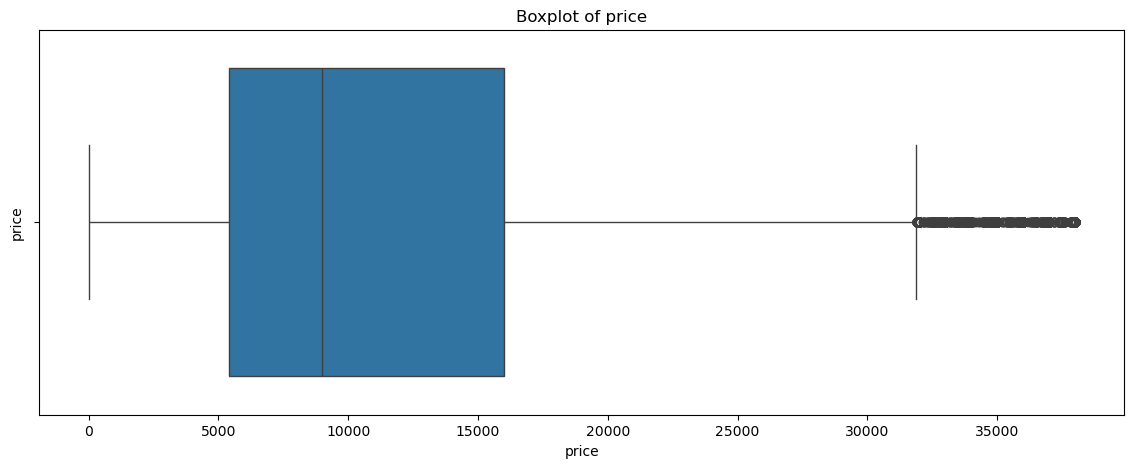

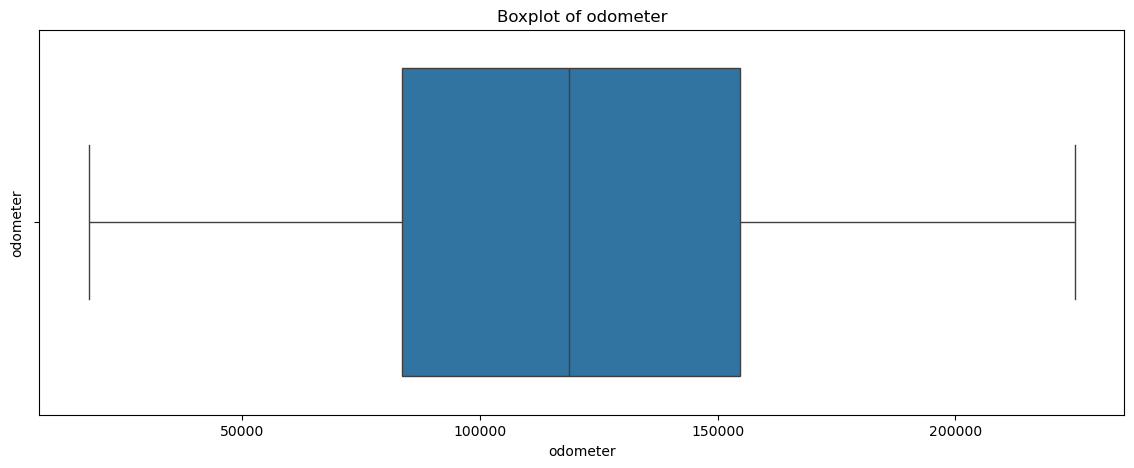

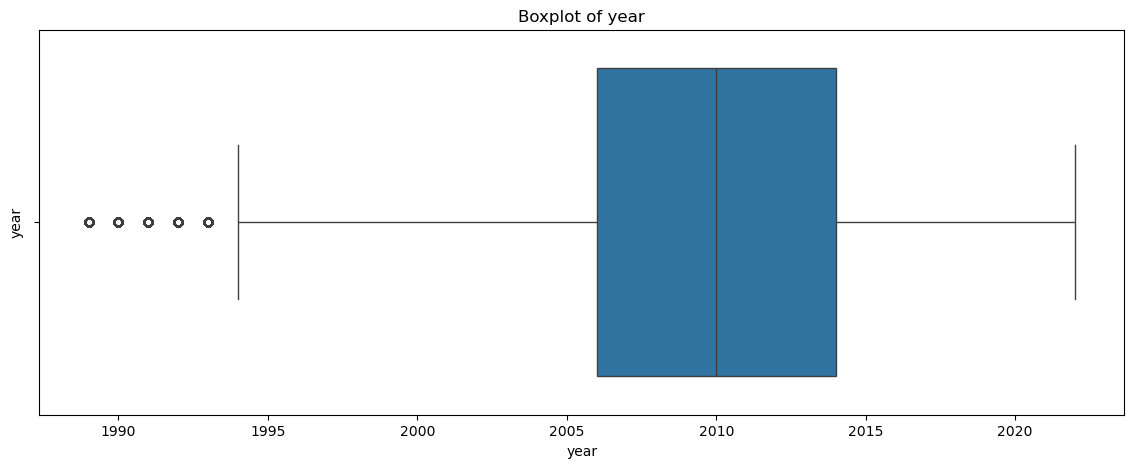

In [20]:
for column in numerics:
    plt.figure(figsize=(14,5))
    sns.boxplot(x=data[column])
    plt.title(f"Boxplot of {column}")
    plt.ylabel(column)
    plt.show()

#### Feature Engineering

The dataset contains some nominal and ordinal data that is not conducive to the kinds of linear regression modeling we will be doing. This section will address these columns.

In [21]:
data.describe(exclude=[np.number])

,condition,cylinders,fuel,title_status,transmission,drive,size,type
count,68680,68680,68680,68680,68680,68680,68680,68680
unique,6,8,5,6,3,3,4,13
top,excellent,4 cylinders,gas,clean,automatic,4wd,full-size,sedan
freq,35332,24789,64152,64513,63351,27644,36649,20887


##### Nominal data

The following columns are nominal:
 - fuel
 - title_status
 - transmission
 - drive
 - type
 
One-hot encoding will enable us to model these. One-hot encode, then drop the nominal versions of the columns.

In [22]:
nominal_columns = ['fuel', 'title_status', 'transmission', 'drive', 'type']
data = pd.get_dummies(data, columns = nominal_columns, drop_first = True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68680 entries, 31 to 426833
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    68680 non-null  int64  
 1   year                     68680 non-null  float64
 2   condition                68680 non-null  object 
 3   cylinders                68680 non-null  object 
 4   odometer                 68680 non-null  float64
 5   size                     68680 non-null  object 
 6   fuel_electric            68680 non-null  uint8  
 7   fuel_gas                 68680 non-null  uint8  
 8   fuel_hybrid              68680 non-null  uint8  
 9   fuel_other               68680 non-null  uint8  
 10  title_status_lien        68680 non-null  uint8  
 11  title_status_missing     68680 non-null  uint8  
 12  title_status_parts only  68680 non-null  uint8  
 13  title_status_rebuilt     68680 non-null  uint8  
 14  title_status_salvage

##### Ordinal data

The ordinal data in this data set are:
 - condition
 - cylinders
 - size
 
 These all represent some scale of increasing magnitude:
  - worse to better condition
  - fewer to more cylinders
  - smaller to larger size

In [23]:
# condition
# execute encoding
conditions = data[['condition']].values.reshape(-1,1)


condition_encoder = OrdinalEncoder(categories=[['salvage', 'fair', 'good', 'excellent', 'like new', 'new']])
conditions_encoded = condition_encoder.fit_transform(conditions)

data['condition_encoded'] = conditions_encoded

pd.crosstab(data['condition_encoded'], data['condition'])

condition,excellent,fair,good,like new,new,salvage
condition_encoded,,,,,,
0.0,0,0,0,0,0,196
1.0,0,2252,0,0,0,0
2.0,0,0,22269,0,0,0
3.0,35332,0,0,0,0,0
4.0,0,0,0,8407,0,0
5.0,0,0,0,0,224,0


In [24]:
data['size'].unique()

array(['full-size', 'mid-size', 'compact', 'sub-compact'], dtype=object)

In [25]:
# size
# execute encoding
sizes = data[['size']].values.reshape(-1,1)


size_encoder = OrdinalEncoder(categories=[['sub-compact', 'compact', 'mid-size', 'full-size']])
sizes_encoded = size_encoder.fit_transform(sizes)

data['sizes_encoded'] = sizes_encoded

pd.crosstab(data['sizes_encoded'], data['size'])

size,compact,full-size,mid-size,sub-compact
sizes_encoded,,,,
0.0,0,0,0,1267
1.0,9232,0,0,0
2.0,0,0,21532,0
3.0,0,36649,0,0


Cylinders is different than the other two columns, as it implies a specific numerical mapping.

In [26]:
data['cylinders'].value_counts()

4 cylinders     24789
6 cylinders     24337
8 cylinders     17822
5 cylinders       698
10 cylinders      661
other             172
3 cylinders       158
12 cylinders       43
Name: cylinders, dtype: int64

I don't know what "other" means, and it is not many rows, so dropping these records from the dataset is good.

In [27]:
data = data.query("cylinders != 'other'")
data['cylinders'].value_counts()

4 cylinders     24789
6 cylinders     24337
8 cylinders     17822
5 cylinders       698
10 cylinders      661
3 cylinders       158
12 cylinders       43
Name: cylinders, dtype: int64

In [28]:
# mapping
# create a mapping so we can impute income
cylinder_mapping = {
    '3 cylinders': 3,
    '4 cylinders': 4,
    '5 cylinders': 5,
    '6 cylinders': 6,
    '8 cylinders': 8,
    '10 cylinders': 10,
    '12 cylinders': 12
}

data['cylinders'] = data['cylinders'].replace(cylinder_mapping)
data['cylinders'] = pd.to_numeric(data['cylinders'], errors='coerce')
data['cylinders'].value_counts()

4     24789
6     24337
8     17822
5       698
10      661
3       158
12       43
Name: cylinders, dtype: int64

In [29]:
# wrap everything up by dropping size and condition. not necessary to drop
# cylinder, as that was replaced

data.drop('size', axis=1, inplace=True)
data.drop('condition', axis=1, inplace=True)
data.head(6)


,price,year,cylinders,odometer,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,...,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,condition_encoded,sizes_encoded
31,15000,2013.0,6,128000.0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,3.0,3.0
55,19900,2004.0,8,88000.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2.0,3.0
59,14000,2012.0,6,95000.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,3.0,3.0
65,22500,2001.0,8,144700.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2.0,3.0
73,15000,2017.0,8,90000.0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,3.0,2.0
86,3000,2004.0,6,176144.0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,2.0,2.0


##### Dimension analysis/reduction

In [30]:
correlation_matrix = data.corr()
correlation_matrix

,price,year,cylinders,odometer,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,...,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,condition_encoded,sizes_encoded
price,1.000000,0.462478,0.288205,-0.397508,-0.002137,-0.226810,-0.026021,-0.000933,0.054218,-0.039041,...,-0.061023,0.031286,-0.022980,0.134920,-0.289824,0.362772,0.068125,-0.076819,0.231933,0.248744
year,0.462478,1.000000,-0.211902,-0.433938,0.012826,0.046609,0.040056,0.010293,0.047737,-0.038325,...,-0.004697,-0.038269,-0.028908,-0.062970,0.050382,-0.015483,0.045638,0.004166,0.297491,-0.015317
cylinders,0.288205,-0.211902,1.000000,0.146202,-0.019460,-0.081105,-0.105286,0.012111,0.007425,-0.000834,...,0.001654,0.004728,0.003442,0.258278,-0.320935,0.380790,0.080093,-0.089169,-0.073162,0.468328
odometer,-0.397508,-0.433938,0.146202,1.000000,-0.015377,-0.078084,-0.002211,-0.004659,-0.035844,0.018749,...,0.040450,-0.000964,-0.002466,0.094211,-0.076178,0.071614,-0.023496,-0.002875,-0.295077,0.118996
fuel_electric,-0.002137,0.012826,-0.019460,-0.015377,1.000000,-0.075554,-0.002288,-0.000679,-0.001803,-0.000732,...,-0.003245,-0.001209,-0.001453,-0.005522,0.009236,-0.008182,-0.003735,-0.003029,0.006261,-0.016775
fuel_gas,-0.226810,0.046609,-0.081105,-0.078084,-0.075554,1.000000,-0.438526,-0.130104,-0.014390,0.001626,...,0.036979,0.007190,-0.023996,-0.091613,0.102006,-0.256506,0.022958,0.021371,0.026003,-0.103355
fuel_hybrid,-0.026021,0.040056,-0.105286,-0.002211,-0.002288,-0.438526,1.000000,-0.003941,0.005216,-0.000763,...,-0.016415,-0.007017,0.000380,-0.031056,0.021361,-0.040564,-0.020971,-0.003807,0.028206,-0.070885
fuel_other,-0.000933,0.010293,0.012111,-0.004659,-0.000679,-0.130104,-0.003941,1.000000,0.001643,-0.001261,...,0.002468,-0.002082,0.015111,0.000426,0.002455,0.001686,0.002979,-0.005216,0.006703,0.001607
title_status_lien,0.054218,0.047737,0.007425,-0.035844,-0.001803,-0.014390,0.005216,0.001643,1.000000,-0.003347,...,-0.007706,-0.002855,0.006717,0.011806,-0.013562,0.005856,-0.009045,-0.001887,0.001309,0.002191
title_status_missing,-0.039041,-0.038325,-0.000834,0.018749,-0.000732,0.001626,-0.000763,-0.001261,-0.003347,1.000000,...,-0.006025,0.004291,0.024531,0.000497,0.000590,-0.008439,-0.004753,-0.005624,-0.062326,-0.010555


In [31]:
# too many dimensions to use a heatmap, so will identify and sort the correlations by threshold
corr_threshold = 0.3

# restructure correlation matrix so I can pair up the features and see the correlation
correlation_long = correlation_matrix.unstack().reset_index()
correlation_long.columns = ['Feature_1', 'Feature_2', 'Correlation']
correlation_long = correlation_long[correlation_long['Feature_1'] != correlation_long['Feature_2']]

# filter and sort by correlation so we can see the relationships
correlation_long = correlation_long.query("abs(Correlation) >= @corr_threshold").sort_values(by='Correlation', ascending=False)

# remove price, since that's our target and we're worried about feature relationships
correlation_long = correlation_long.query("Feature_1 != 'price' and Feature_2 != 'price'")

correlation_long

,Feature_1,Feature_2,Correlation
932,sizes_encoded,cylinders,0.468328
92,cylinders,sizes_encoded,0.468328
490,drive_fwd,type_sedan,0.451058
790,type_sedan,drive_fwd,0.451058
808,type_truck,cylinders,0.380790
88,cylinders,type_truck,0.380790
78,cylinders,drive_rwd,0.306808
498,drive_rwd,cylinders,0.306808
495,drive_fwd,sizes_encoded,-0.306470
945,sizes_encoded,drive_fwd,-0.306470


In [32]:
# remove the duplicate pairs

corr_sorted = pd.DataFrame(np.sort(correlation_long[['Feature_1', 'Feature_2']], axis=1), columns=['Feature_1', 'Feature_2'])
merged_corr = pd.merge(corr_sorted, correlation_long, on=['Feature_1', 'Feature_2'], how='inner')

merged_corr.drop_duplicates(inplace=True)
merged_corr

,Feature_1,Feature_2,Correlation
0,cylinders,sizes_encoded,0.468328
2,drive_fwd,type_sedan,0.451058
4,cylinders,type_truck,0.380790
6,cylinders,drive_rwd,0.306808
8,drive_fwd,sizes_encoded,-0.306470
10,drive_fwd,type_truck,-0.316853
12,cylinders,type_sedan,-0.320935
14,drive_fwd,drive_rwd,-0.405664
16,odometer,year,-0.433938
18,fuel_gas,fuel_hybrid,-0.438526


There are 11 pairs of columns that have "medium" correlation (abs(0-.3: low; .3-.7: medium; .7-1: high)).

Cylinders is part of 5 of these relationships. 
 - with sizes
 - with trucks
 - with rear wheel drive
 - with sedan
 - with forward drive
 
Logically, these findings make sense. We would expect large vehicles with big bodies to have more cylinders.

We will drop this column given its pervasiveness in the list of medium correlated features

In [33]:
data.drop('cylinders', axis=1, inplace=True)
data.head(6)


,price,year,odometer,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,...,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,condition_encoded,sizes_encoded
31,15000,2013.0,128000.0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3.0,3.0
55,19900,2004.0,88000.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2.0,3.0
59,14000,2012.0,95000.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,3.0,3.0
65,22500,2001.0,144700.0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2.0,3.0
73,15000,2017.0,90000.0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,3.0,2.0
86,3000,2004.0,176144.0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,2.0,2.0


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

__Note:__ cross validation and hyperparameter tuning will occur after initial evaluation, in the next phase.

In [34]:
# divide data for training and test
np.random.seed(10)
X = data.drop(['price'], axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2)

# we should scale data, because we have a mix of binary and continuous values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)
linear_predictions = linear_model.predict(X_test_scaled)

In [36]:
# use default hyperparameters
ridge_model = Ridge() 
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)

In [37]:
# use default hyperparameters
lasso_model = Lasso() 
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

##### Evaluation Metric: Mean Squared Error

Mean Squared Error is the chosen method for scoring and evaluating our models.
Three regression models have been selected to evaluate:
 - Linear
 - Ridge
 - Lasso

In [38]:
linear_mse = mean_squared_error(linear_predictions, y_test)
print(f'Linear MSE: {linear_mse}')

Linear MSE: 28924325.422007218


In [39]:
ridge_mse = mean_squared_error(ridge_predictions, y_test)
print(f'Ridge MSE: {ridge_mse}')

Ridge MSE: 28924348.38632558


In [40]:
lasso_mse = mean_squared_error(lasso_predictions, y_test)
print(f'Lasso MSE: {lasso_mse}')

Lasso MSE: 28925183.094838522


The scored MSE for all three model types is very close. The Linear MSE just edged out Ridge MSE.

Below the Linear model predictions are plotted against perfect predictions.

The major observation is that the model is very good, especially for the lower priced vehicles.

Once vehicle price increases, roughly around the $20,000 mark, the model begins underestimating price.

There might be some feature we've dropped or that we don't have that could explain this. Brand might have major weight for more expensive vehicles, for example, because the purchase becomes about conspicuous consumption as much as the vehicle itself.

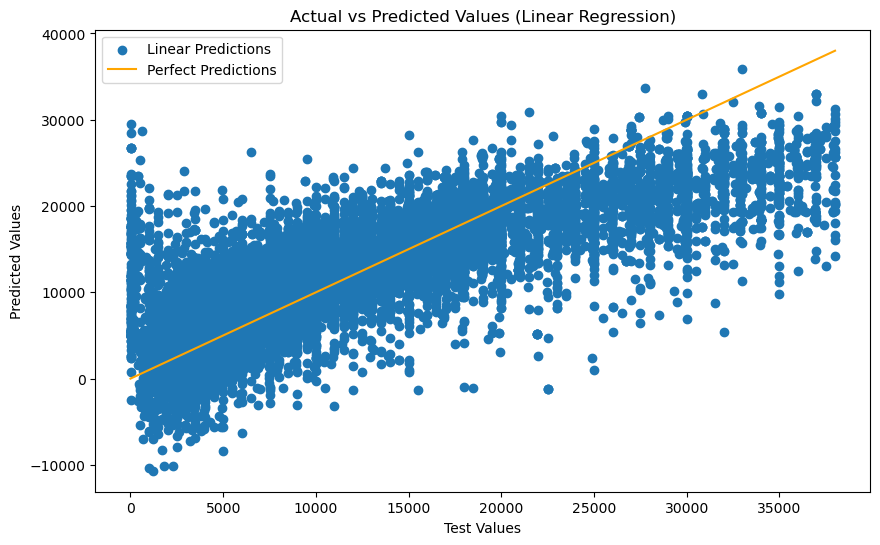

In [41]:
# plotting predictions vs test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_predictions, alpha=1, label='Linear Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],  color='orange', label='Perfect Predictions')
plt.title('Actual vs Predicted Values (Linear Regression)')
plt.xlabel('Test Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

##### Cross Validation
Cross validation is important to ensure we can recreate results, and that our findings are reliable.

In [42]:
kf = KFold(n_splits=5, shuffle=True) # 5 is default, and computationally better given our large data

scores = cross_val_score(linear_model, X, y, scoring='neg_mean_squared_error', cv=kf)
scores_positive = -scores

i= 1
for score in scores_positive:
    print(f"PV Score {i}: {score}, % of original score: {score/linear_mse}")
    i+=1

PV Score 1: 29090708.135799907, % of original score: 1.0057523455211197
PV Score 2: 28793351.130972244, % of original score: 0.9954718290185146
PV Score 3: 29096409.938217536, % of original score: 1.0059494737975596
PV Score 4: 29308621.547763597, % of original score: 1.0132862606179913
PV Score 5: 28473570.97140627, % of original score: 0.9844160773319889


##### Hyper parameter tuning

It might be possible to improve on this model.

Linear regression has no hyper parameters to optimize, but the Ridge model, for example, can be subjected to tuning to see if it can outperform the Linear Regression model.

In [43]:
# list of alphas to test
alphas = np.linspace(0.1, 10, 20)
param_grid = {'alpha': alphas}

# grid search
grid_search = GridSearchCV(ridge_model, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, y_train)
best_alpha = grid_search.best_params_['alpha']
print(f'Best alpha: {best_alpha}')

Best alpha: 1.6631578947368424


In [44]:
# Run model again with the better alpha, and check the MSE
ridge_model = Ridge(alpha=best_alpha) 
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)

new_ridge_mse = mean_squared_error(ridge_predictions, y_test)
print(f'MSE for new Ridge: {new_ridge_mse}')
print(f'New MSE is lower than old MSE? {new_ridge_mse < ridge_mse}')
print(f'Difference in MSE = {new_ridge_mse - ridge_mse}')
print(f'Better than Linear Regression = {linear_mse > new_ridge_mse}')

MSE for new Ridge: 28924363.627947275
New MSE is lower than old MSE? False
Difference in MSE = 15.241621695458889
Better than Linear Regression = False


Surprisingly, this did not improve performance. This might be due to some overfitting of the validation set, or a limited search space for alphas. There may also be other hyperparameters interacting with the alpha in ways we've not uncovered.

LASSO can also be tuned for alpha.

In [45]:
# Run model again with the better alpha, and check the MSE
lasso_model = Lasso(alpha=best_alpha) 
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)

new_lasso_mse = mean_squared_error(lasso_predictions, y_test)
print(f'MSE for new LASSO: {new_lasso_mse}')
print(f'New MSE is lower than old MSE? {new_lasso_mse < lasso_mse}')
print(f'Difference in MSE = {new_lasso_mse - lasso_mse}')
print(f'Better than Linear Regression = {linear_mse > new_lasso_mse}')

MSE for new LASSO: 28925790.63647266
New MSE is lower than old MSE? False
Difference in MSE = 607.5416341386735
Better than Linear Regression = False


Linear Regression remains ahead of Ridge and LASSO.

##### Interpretation

In [46]:
linear_coef = linear_model.coef_
feature_names = X.columns
coefficients_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': linear_coef})
coefficients_df.sort_values(by='Coefficient')

,Feature,Coefficient
1,odometer,-2549.839638
13,drive_fwd,-1859.454505
3,fuel_gas,-1781.553389
12,transmission_other,-1056.931187
23,type_sedan,-881.670695
4,fuel_hybrid,-691.169130
26,type_wagon,-434.163436
9,title_status_rebuilt,-373.788568
18,type_hatchback,-369.352960
14,drive_rwd,-345.198009


In [47]:
# get standard deviations to contextualize above results, because we used standard scaler
X.describe()

,year,odometer,fuel_electric,fuel_gas,fuel_hybrid,fuel_other,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,...,type_mini-van,type_offroad,type_other,type_pickup,type_sedan,type_truck,type_van,type_wagon,condition_encoded,sizes_encoded
count,68508.000000,68508.000000,68508.000000,68508.000000,68508.000000,68508.000000,68508.000000,68508.000000,68508.000000,68508.000000,...,68508.000000,68508.000000,68508.000000,68508.000000,68508.000000,68508.000000,68508.000000,68508.000000,68508.000000,68508.000000
mean,2009.481798,119198.687365,0.000394,0.935394,0.013108,0.001168,0.008174,0.001358,0.000438,0.035368,...,0.026012,0.003693,0.005328,0.071787,0.304461,0.145136,0.034171,0.022742,2.730440,2.363301
std,5.790798,48755.062746,0.019849,0.245830,0.113738,0.034153,0.090042,0.036820,0.020922,0.184710,...,0.159171,0.060658,0.072798,0.258137,0.460182,0.352241,0.181670,0.149081,0.737417,0.780778
min,1989.000000,17622.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,83854.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
50%,2010.000000,118966.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000
75%,2014.000000,154643.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,3.000000,3.000000
max,2022.000000,225191.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,3.000000


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

Please see the associated readme file for a detailed report of these findings:

https://github.com/jheberer/Berkeley-Profession-Certificate-in-ML---Assignment-2/blob/main/README.md